In [1]:
import dlib
import cv2
import json

# create list for landmarks
ALL = list(range(0, 68))
RIGHT_EYEBROW = list(range(17, 22))
LEFT_EYEBROW = list(range(22, 27))
RIGHT_EYE = list(range(36, 42))
LEFT_EYE = list(range(42, 48))
NOSE = list(range(27, 36))
MOUTH_OUTLINE = list(range(48, 61))
MOUTH_INNER = list(range(61, 68))
JAWLINE = list(range(0, 17))

# create face detector, predictor
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor('shape_predictor_68_face_landmarks.dat')

In [2]:
# read image
image = cv2.imread("zuckerberg.jpg", cv2.IMREAD_COLOR)

In [3]:
# gray scale conversion
img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [4]:
# get only 1 face (up-sampling=1)
face = detector(img_gray, 1)[0]

In [5]:
# make prediction and transform to numpy array
landmarks = predictor(img_gray, face)

In [6]:
# get 68 points
points = landmarks.parts()

In [7]:
# print 68 points
for i, p in enumerate(points) :
    print('[%d] (%d, %d)' % (i, p.x, p.y))

[0] (283, 404)
[1] (281, 460)
[2] (283, 515)
[3] (292, 571)
[4] (314, 624)
[5] (348, 674)
[6] (390, 718)
[7] (436, 754)
[8] (488, 764)
[9] (534, 751)
[10] (569, 711)
[11] (601, 667)
[12] (628, 621)
[13] (646, 573)
[14] (655, 525)
[15] (661, 477)
[16] (664, 430)
[17] (347, 389)
[18] (377, 370)
[19] (415, 366)
[20] (452, 371)
[21] (488, 386)
[22] (557, 388)
[23] (585, 378)
[24] (615, 375)
[25] (644, 378)
[26] (660, 400)
[27] (521, 431)
[28] (522, 474)
[29] (523, 517)
[30] (524, 560)
[31] (470, 558)
[32] (492, 571)
[33] (517, 583)
[34] (540, 573)
[35] (559, 560)
[36] (391, 420)
[37] (416, 411)
[38] (441, 411)
[39] (461, 428)
[40] (438, 431)
[41] (413, 429)
[42] (562, 430)
[43] (584, 416)
[44] (608, 415)
[45] (624, 426)
[46] (608, 436)
[47] (585, 435)
[48] (409, 586)
[49] (445, 589)
[50] (483, 593)
[51] (509, 600)
[52] (533, 596)
[53] (558, 595)
[54] (578, 593)
[55] (555, 640)
[56] (529, 665)
[57] (503, 668)
[58] (474, 663)
[59] (438, 637)
[60] (419, 591)
[61] (481, 605)
[62] (508, 611)
[6

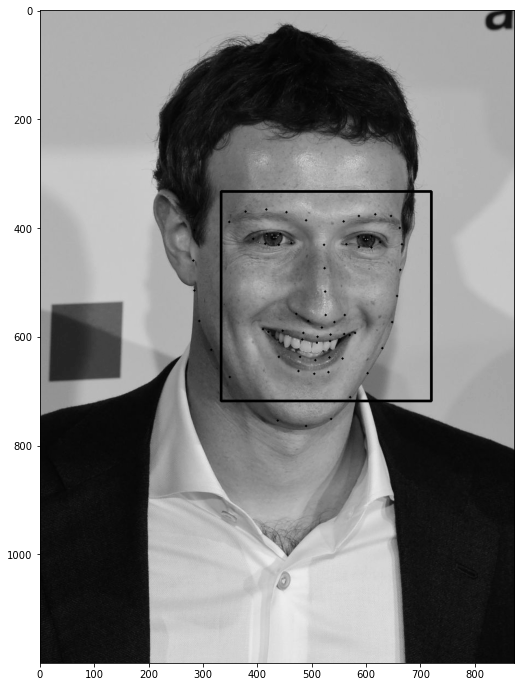

In [8]:
import matplotlib.pyplot as plt

cv2.rectangle(img_gray, (face.left(), face.top()), (face.right(), face.bottom()),
              (0, 0, 255), 3)

for p in points :
    cv2.circle(img_gray, (p.x, p.y), 2, (0, 255, 0), -1)

plt.figure(figsize=(16, 12))
plt.imshow(img_gray, cmap='gray')
plt.show()

In [9]:
# write landmarks to landmarks.json
with open("landmarks.json", "w") as json_file :
    landmark_dict = { i : [p.x, p.y] for i, p in enumerate(points) }
    json_file.write(json.dumps(landmark_dict))
    json_file.write('\n')